In [1]:
#importing necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

# Loading the Dataset

In [2]:
df=pd.read_csv("TRAIN.csv")
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [3]:
df2=pd.read_csv("TEST_FINAL.csv")
df2

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No
...,...,...,...,...,...,...,...,...
22260,T1210601,186,S2,L5,R2,2019-07-31,0,No
22261,T1210602,11,S4,L2,R1,2019-07-31,0,No
22262,T1210603,185,S1,L1,R3,2019-07-31,0,Yes
22263,T1210604,69,S1,L1,R4,2019-07-31,0,No


### Looking for null or nan values

In [4]:
df.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [5]:
df2.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [6]:
df2.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


In [7]:
df.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


### Data Visualization

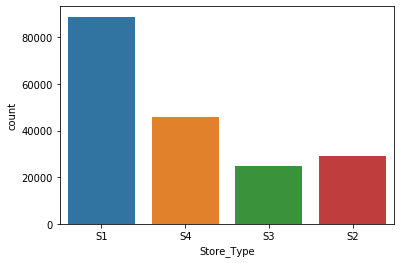

In [10]:
sns.countplot(df['Store_Type'])

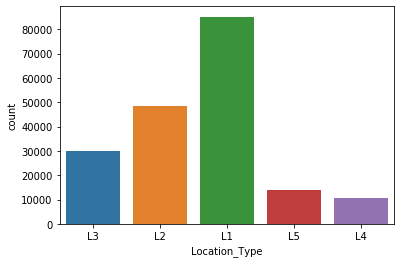

In [11]:
sns.countplot(df['Location_Type'])

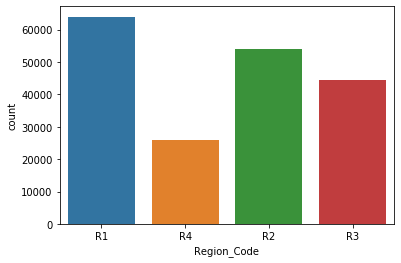

In [12]:
sns.countplot(df['Region_Code'])

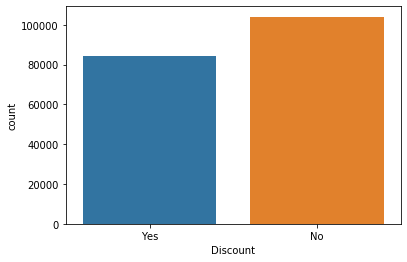

In [13]:
sns.countplot(df['Discount'])

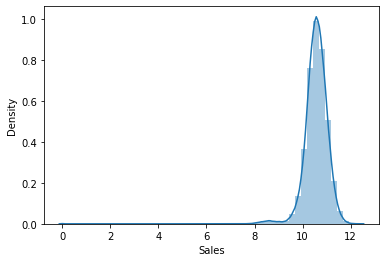

In [14]:
# numerical attributes visualization
a= np.log(df['Sales']+1)
sns.distplot(a)

### Feature scaling the numerical values

In [15]:
sts = MaxAbsScaler()

In [16]:
feature_scale = ['Store_id','#Order']
df[feature_scale]=sts.fit_transform(df[feature_scale])

In [17]:
feature_scale = ['Store_id']
df2[feature_scale]=sts.fit_transform(df2[feature_scale])

In [18]:
# drop unnecessary columns
cols = ['ID', 'Date']
df = df.drop(columns=cols, axis=1)
df.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
0,0.002740,S1,L3,R1,1,Yes,0.024259,7011.84
1,0.693151,S4,L2,R1,1,Yes,0.161725,51789.12
2,0.690411,S3,L2,R1,1,Yes,0.113208,36868.20
3,0.687671,S2,L3,R1,1,Yes,0.061995,19715.16
4,0.684932,S2,L3,R4,1,Yes,0.167116,45614.52


In [19]:
ide=df2['ID']

In [20]:
# drop unnecessary columns
cols = ['ID', 'Date']
df2= df2.drop(columns=cols, axis=1)
df2.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,0.468493,S4,L2,R3,0,No
1,0.471233,S1,L1,R1,0,No
2,0.473973,S4,L2,R1,0,No
3,0.476712,S1,L1,R4,0,No
4,0.465753,S1,L1,R2,0,No


### Label Encoding for Categorical Variable

In [21]:
cols = ['Store_Type','Location_Type','Region_Code','Discount']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [22]:
cols = ['Store_Type','Location_Type','Region_Code','Discount']
le = LabelEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [23]:
df

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,Sales
0,0.002740,0,2,0,1,1,0.024259,7011.84
1,0.693151,3,1,0,1,1,0.161725,51789.12
2,0.690411,2,1,0,1,1,0.113208,36868.20
3,0.687671,1,2,0,1,1,0.061995,19715.16
4,0.684932,1,2,3,1,1,0.167116,45614.52
...,...,...,...,...,...,...,...,...
188335,0.408219,1,2,1,1,1,0.137466,37272.00
188336,0.419178,3,1,0,1,0,0.242588,54572.64
188337,0.421918,0,2,1,1,0,0.150943,31624.56
188338,0.424658,2,0,1,1,1,0.188679,49162.41


In [24]:
df2

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,0.468493,3,1,2,0,0
1,0.471233,0,0,0,0,0
2,0.473973,3,1,0,0,0
3,0.476712,0,0,3,0,0
4,0.465753,0,0,1,0,0
...,...,...,...,...,...,...
22260,0.509589,1,4,1,0,0
22261,0.030137,3,1,0,0,0
22262,0.506849,0,0,2,0,1
22263,0.189041,0,0,3,0,0


# Model creation and Evaluation

In [25]:
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [26]:
model = XGBRegressor()

In [27]:
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
model.score(x,y)

0.9548025392067898

In [29]:
df.drop('Sales',axis=1,inplace=True)

In [30]:
y_predicted=model.predict(df)

In [31]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    legend = plt.legend(loc = "upper right",fontsize = "medium")
    plt.xlabel('no. of entries')
    plt.ylabel('Sales')
    
    plt.show()
    plt.close()

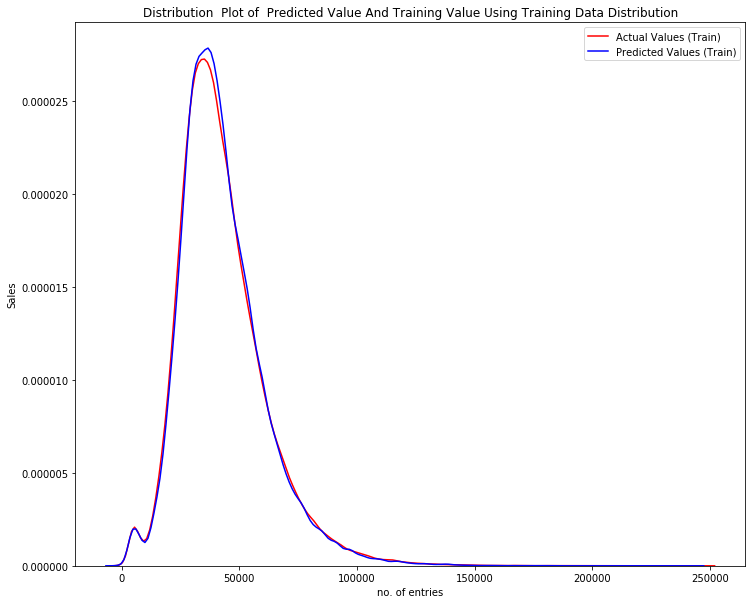

In [32]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(y, y_predicted, "Actual Values (Train)", "Predicted Values (Train)", Title)

### Preparing test data by adding order column by predicting it

In [33]:
a=df.drop(['#Order'],axis=1)
b=df['#Order']

In [34]:
model_order = XGBRegressor()

In [35]:
model_order.fit(a,b)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
model_order.score(a,b)

0.7318079682354668

In [37]:
predict_o=model_order.predict(df2)

In [38]:
order=pd.DataFrame({
    '#Order':predict_o})

In [46]:
predict_o

array([0.21924599, 0.1607778 , 0.30757323, ..., 0.178823  , 0.1344925 ,
       0.10498334], dtype=float32)

In [39]:
horizontal_concat = pd.concat([df2, order], axis=1)

In [40]:
horizontal_concat

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order
0,0.468493,3,1,2,0,0,0.219246
1,0.471233,0,0,0,0,0,0.160778
2,0.473973,3,1,0,0,0,0.307573
3,0.476712,0,0,3,0,0,0.134265
4,0.465753,0,0,1,0,0,0.144457
...,...,...,...,...,...,...,...
22260,0.509589,1,4,1,0,0,0.080953
22261,0.030137,3,1,0,0,0,0.272234
22262,0.506849,0,0,2,0,1,0.178823
22263,0.189041,0,0,3,0,0,0.134493


### final prediction & saving to csv file

In [41]:
predict_final=model.predict(horizontal_concat)

In [42]:
submission=pd.DataFrame({
    'ID':ide,
    'Sales':predict_final
})

In [43]:
submission

,ID,Sales
0,T1188341,47811.054688
1,T1188342,35807.175781
2,T1188343,71316.429688
3,T1188344,33095.531250
4,T1188345,36670.914062
...,...,...
22260,T1210601,20340.222656
22261,T1210602,57659.550781
22262,T1210603,48682.753906
22263,T1210604,31797.830078


In [44]:
submission.describe()

,Sales
count,22265.000000
mean,43079.078125
std,14651.329102
min,13155.580078
25%,32867.906250
50%,40797.750000
75%,50415.480469
max,118957.687500


In [45]:
submission.to_csv('second_try.csv',index=False)